<a href="https://colab.research.google.com/github/MuhammadBasilKhan/Fine-tune-model/blob/main/agriculture_datamodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
imagesize=256
Batchsize=32
CHANNELS=3
EPOCHS=50

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drive/agriculture data/agriculture/kag2",
                                                    shuffle=True,
                                                    image_size=(imagesize,imagesize),
                                                    batch_size=Batchsize)


Found 804 files belonging to 5 classes.


In [ ]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drive/agriculture data/agriculture/crop_images",
                                                    shuffle=True,
                                                    image_size=(imagesize,imagesize),
                                                    batch_size=Batchsize)


Found 201 files belonging to 5 classes.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drive/agriculture data/agriculture/crop_images",
                                                    shuffle=True,
                                                    image_size=(imagesize,imagesize),
                                                    batch_size=Batchsize)


Found 201 files belonging to 5 classes.


In [ ]:

class_names=train_ds.class_names
class_names

['jute', 'maize', 'rice', 'sugarcane', 'wheat']

In [ ]:
class_names1=test_ds.class_names
class_names1

['jute', 'maize', 'rice', 'sugarcane', 'wheat']

In [ ]:
class_names2=val_ds.class_names
class_names2

['jute', 'maize', 'rice', 'sugarcane', 'wheat']

In [ ]:
len(train_ds)


26

In [ ]:
len(test_ds)

7

In [ ]:
len(val_ds)

7

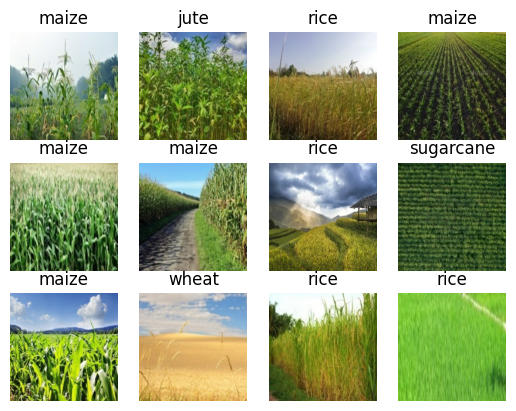

In [ ]:
for image_batch, label_batch in train_ds.take(1):
  #print(image_batch.shape)
  #print(label_batch.numpy())
  #print(image_batch[0].numpy())
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


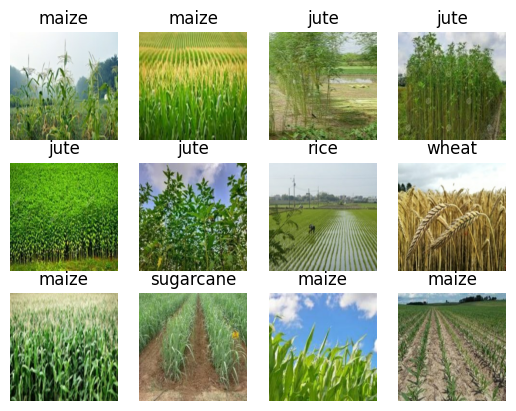

In [ ]:
for image_batch, label_batch in test_ds.take(1):
  #print(image_batch.shape)
  #print(label_batch.numpy())
  #print(image_batch[0].numpy())
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


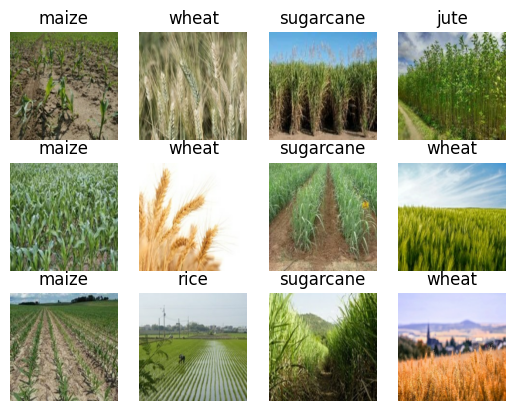

In [ ]:
for image_batch, label_batch in val_ds.take(1):
  #print(image_batch.shape)
  #print(label_batch.numpy())
  #print(image_batch[0].numpy())
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
                    layers.experimental.preprocessing.Resizing(imagesize,imagesize),
                    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(Batchsize,imagesize,imagesize,CHANNELS)
n_classes=44

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

In [ ]:

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,
                  epochs=EPOCHS,
                  batch_size=Batchsize,verbose=1,
                  validation_data=val_ds)


Epoch 1/50
26/26 [==============================] - 74s 148ms/step - loss: 2.2811 - accuracy: 0.1704 - val_loss: 1.6487 - val_accuracy: 0.1990
Epoch 2/50
26/26 [==============================] - 2s 61ms/step - loss: 1.6775 - accuracy: 0.2002 - val_loss: 1.6627 - val_accuracy: 0.1990
Epoch 3/50
26/26 [==============================] - 2s 59ms/step - loss: 1.6338 - accuracy: 0.1915 - val_loss: 1.6043 - val_accuracy: 0.2537
Epoch 4/50
26/26 [==============================] - 2s 60ms/step - loss: 1.6304 - accuracy: 0.2052 - val_loss: 1.6244 - val_accuracy: 0.2786
Epoch 5/50
26/26 [==============================] - 2s 59ms/step - loss: 1.6311 - accuracy: 0.2338 - val_loss: 1.6010 - val_accuracy: 0.2338
Epoch 6/50
26/26 [==============================] - 2s 60ms/step - loss: 1.6137 - accuracy: 0.2512 - val_loss: 1.6126 - val_accuracy: 0.2040
Epoch 7/50
26/26 [==============================] - 2s 64ms/step - loss: 1.5930 - accuracy: 0.2525 - val_loss: 1.5307 - val_accuracy: 0.3234
Epoch 8/50


In [ ]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 24ms/step - loss: 0.5831 - accuracy: 0.7811


[0.5831221342086792, 0.7810945510864258]

In [ ]:

history


In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 26}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5]

[2.2811098098754883,
 1.6775389909744263,
 1.6337502002716064,
 1.6303850412368774,
 1.6311168670654297]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

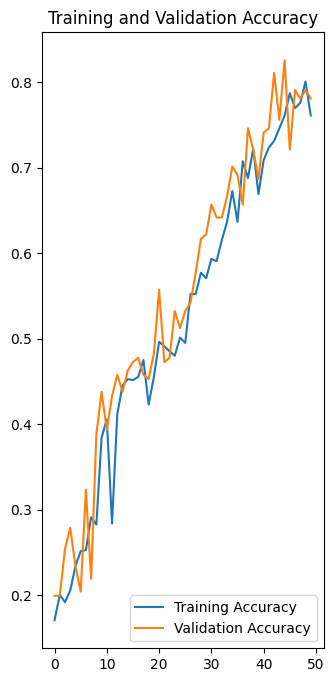

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


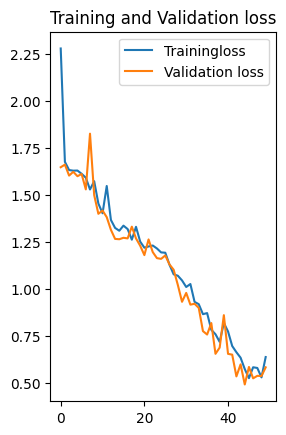

In [ ]:
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Trainingloss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

[[[129 169  20]
  [129 169  18]
  [131 171  20]
  ...
  [115 104  37]
  [139 129  60]
  [126 116  45]]

 [[124 164  15]
  [129 169  20]
  [133 173  22]
  ...
  [ 96  85  18]
  [124 114  44]
  [117 107  36]]

 [[123 163  14]
  [132 172  23]
  [137 177  27]
  ...
  [ 87  77  13]
  [122 112  43]
  [122 113  43]]

 ...

 [[102 123  45]
  [136 157  79]
  [177 197 120]
  ...
  [ 73  77  24]
  [ 72  75  28]
  [ 50  52   9]]

 [[100 120  34]
  [154 173  89]
  [182 201 118]
  ...
  [ 96  99  44]
  [102 104  56]
  [ 62  63  19]]

 [[111 131  42]
  [161 181  92]
  [170 190 104]
  ...
  [110 113  57]
  [128 130  80]
  [ 82  84  37]]]
first image to predict
actual label: jute
1/1 [==============================] - 0s 153ms/step
0
predicted label: jute


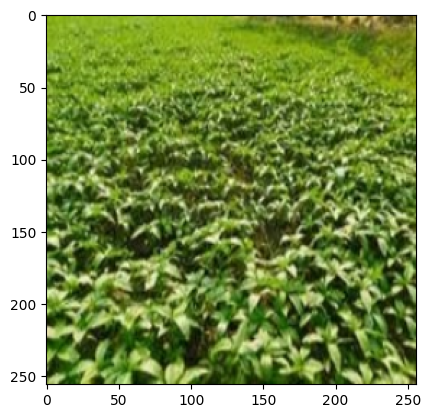

In [ ]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  plt.imshow(images_batch[0].numpy().astype('uint8'))
  print(images_batch[0].numpy().astype('uint8'))
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])
  batch_prediction=model.predict(images_batch)
  print(np.argmax(batch_prediction[0]))
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)
  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 [==============================] - 0s 17ms/step


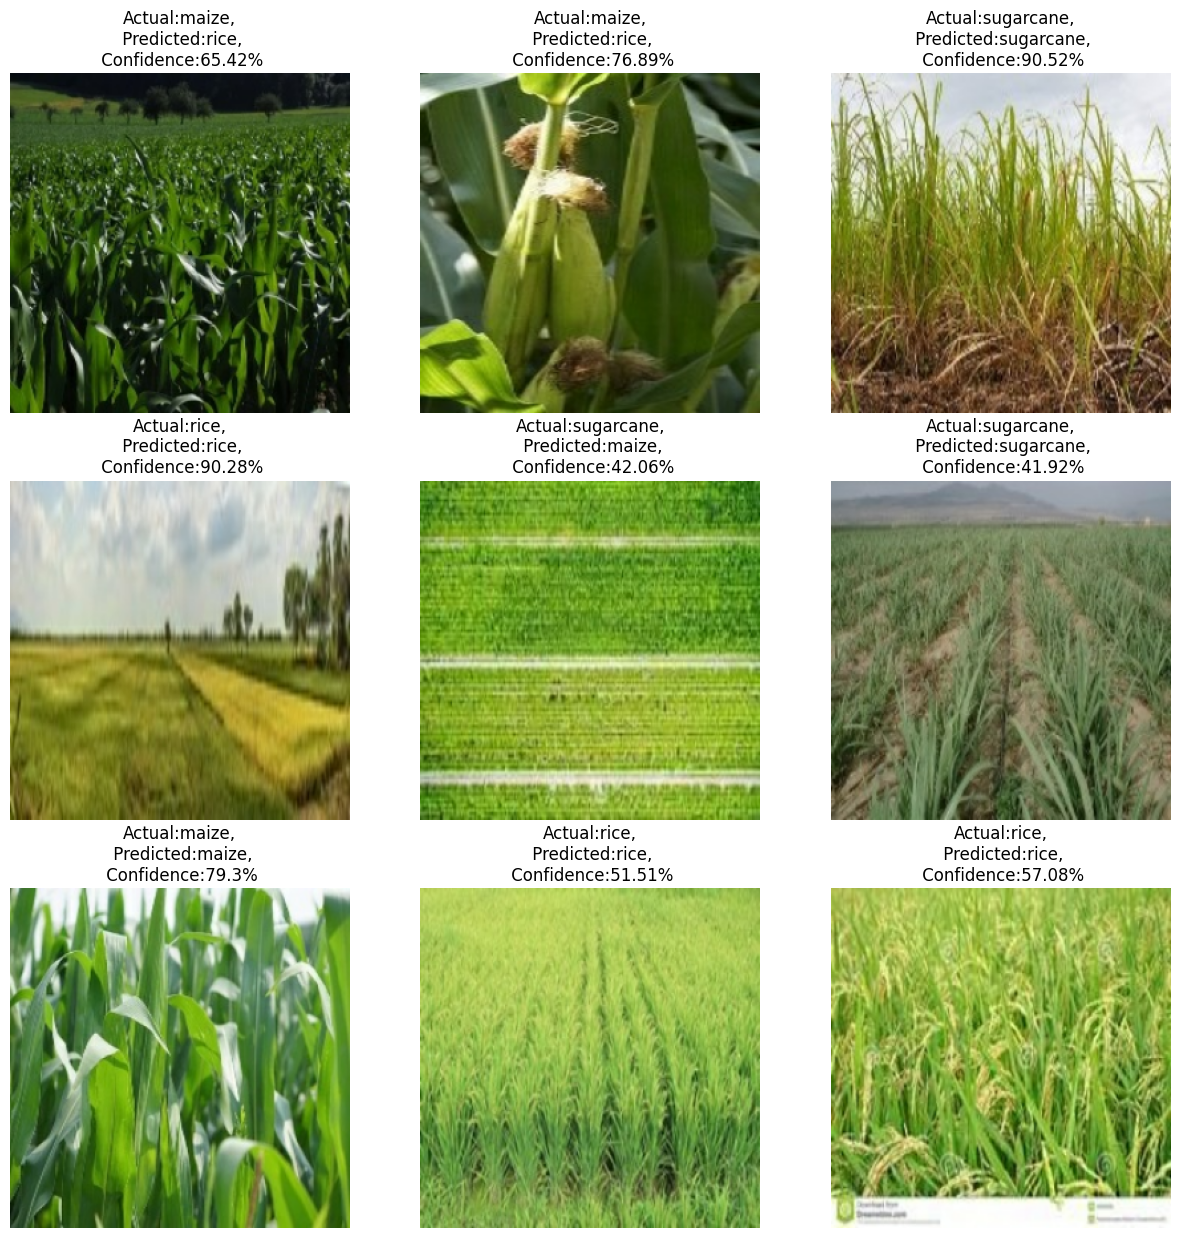

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    axis=plt.subplot(3,3,i+1)

    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]
    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}%")
    plt.axis("off")

In [ ]:

model.save('/content/drive/MyDrive/drive/agriculture data.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('agriculture.model')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')